In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

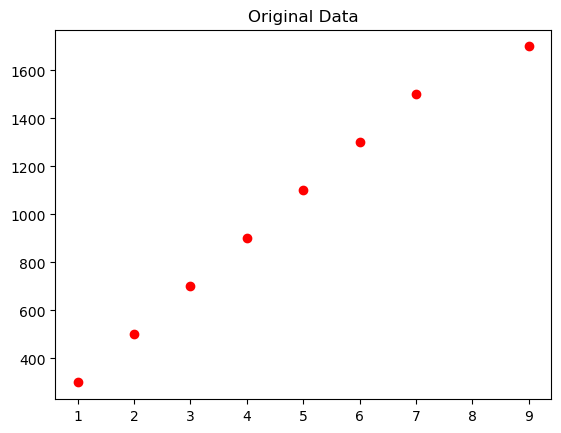

In [3]:
data = np.loadtxt("data/linearRegressionSimple.csv", delimiter=",")

plt.title("Original Data")
plt.plot(data[:,0], data[:,1], 'ro')

In [4]:
pca_2D = PCA(n_components=2)
pca_2D

PCA(n_components=2)

In [5]:
#sklearn does the centering (subtracting mean)
pca_2D.fit(data)
pca_2D.explained_variance_ratio_

array([9.99999653e-01, 3.47201727e-07])

In [6]:
pca_2D.components_

array([[ 0.00541659,  0.99998533],
       [ 0.99998533, -0.00541659]])

Sum of variances: 1.0

pca_2D (transform):
 [[-7.00009366e+02  1.66665538e-01]
 [-5.00006884e+02  8.33330512e-02]
 [-3.00004401e+02  5.64211476e-07]
 [-1.00001918e+02 -8.33319228e-02]
 [ 1.00000564e+02 -1.66664410e-01]
 [ 3.00003047e+02 -2.49996897e-01]
 [ 5.00005529e+02 -3.33329384e-01]
 [ 7.00013429e+02  5.83323459e-01]]

pca_2D (inverse_transform):
 [[1.0e+00 3.0e+02]
 [2.0e+00 5.0e+02]
 [3.0e+00 7.0e+02]
 [4.0e+00 9.0e+02]
 [5.0e+00 1.1e+03]
 [6.0e+00 1.3e+03]
 [7.0e+00 1.5e+03]
 [9.0e+00 1.7e+03]]

Original:
 [[1.0e+00 3.0e+02]
 [2.0e+00 5.0e+02]
 [3.0e+00 7.0e+02]
 [4.0e+00 9.0e+02]
 [5.0e+00 1.1e+03]
 [6.0e+00 1.3e+03]
 [7.0e+00 1.5e+03]
 [9.0e+00 1.7e+03]]


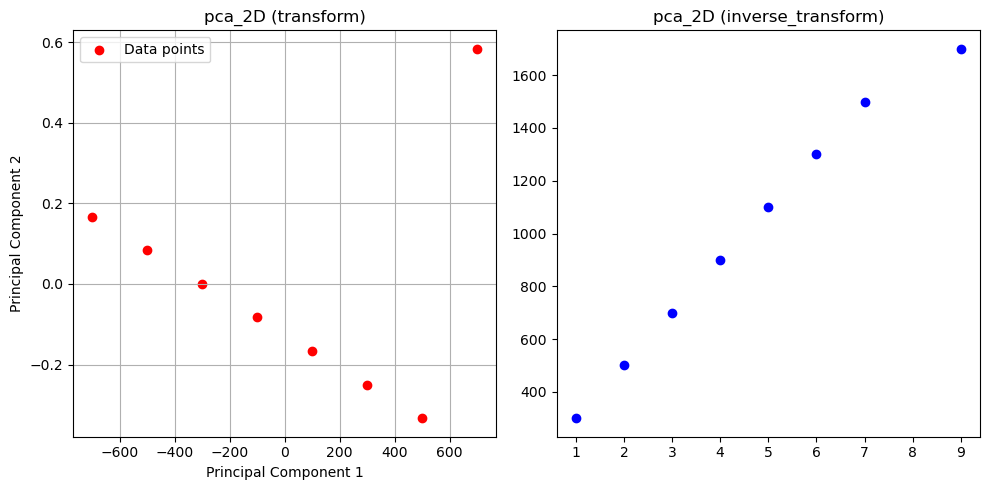

In [7]:
data_2D = pca_2D.transform(data)
data_2D_inverseTransform = pca_2D.inverse_transform(data_2D)

#scaling 2D to 2D doesn't result in a loss in variance sum(==1)
print("Sum of variances:",np.sum(pca_2D.explained_variance_ratio_))

print("\npca_2D (transform):\n",data_2D)
print("\npca_2D (inverse_transform):\n",data_2D_inverseTransform)
print("\nOriginal:\n",data)

plt.figure(figsize=(10, 5))

# Plot 1: transformed 2D data
plt.subplot(1, 2, 1)
plt.scatter(data_2D[:, 0], data_2D[:, 1], c='r', label='Data points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('pca_2D (transform)')
plt.legend()
plt.grid(True)

# Plot 2: reconstructed 2D data after inverse transformation
plt.subplot(1, 2, 2)
plt.title("pca_2D (inverse_transform)")
plt.plot(data_2D_inverseTransform[:, 0], data_2D_inverseTransform[:, 1], 'bo')

plt.tight_layout()
plt.show()

In [8]:
#PCA 1D
pca_1D = PCA(n_components=1)
pca_1D

PCA(n_components=1)

In [9]:
pca_1D.fit(data)
pca_1D.explained_variance_ratio_
#0.99999952 of the variance is explained

array([0.99999965])

In [10]:
pca_1D.components_

array([[0.00541659, 0.99998533]])

In [11]:
data_1D = pca_1D.transform(data)
data_1D

array([[-700.00936626],
       [-500.00688363],
       [-300.00440101],
       [-100.00191839],
       [ 100.00056424],
       [ 300.00304686],
       [ 500.00552949],
       [ 700.0134287 ]])

Sum of variances: 0.9999996527982726

pca_1D (transform):
 [[-700.00936626]
 [-500.00688363]
 [-300.00440101]
 [-100.00191839]
 [ 100.00056424]
 [ 300.00304686]
 [ 500.00552949]
 [ 700.0134287 ]]

pca_1D (inverse_transform):
 [[8.33336907e-01 3.00000903e+02]
 [1.91666817e+00 5.00000451e+02]
 [2.99999944e+00 7.00000000e+02]
 [4.08333070e+00 8.99999549e+02]
 [5.16666196e+00 1.09999910e+03]
 [6.24999323e+00 1.29999865e+03]
 [7.33332449e+00 1.49999819e+03]
 [8.41668510e+00 1.70000316e+03]]

Original:
 [[1.0e+00 3.0e+02]
 [2.0e+00 5.0e+02]
 [3.0e+00 7.0e+02]
 [4.0e+00 9.0e+02]
 [5.0e+00 1.1e+03]
 [6.0e+00 1.3e+03]
 [7.0e+00 1.5e+03]
 [9.0e+00 1.7e+03]]


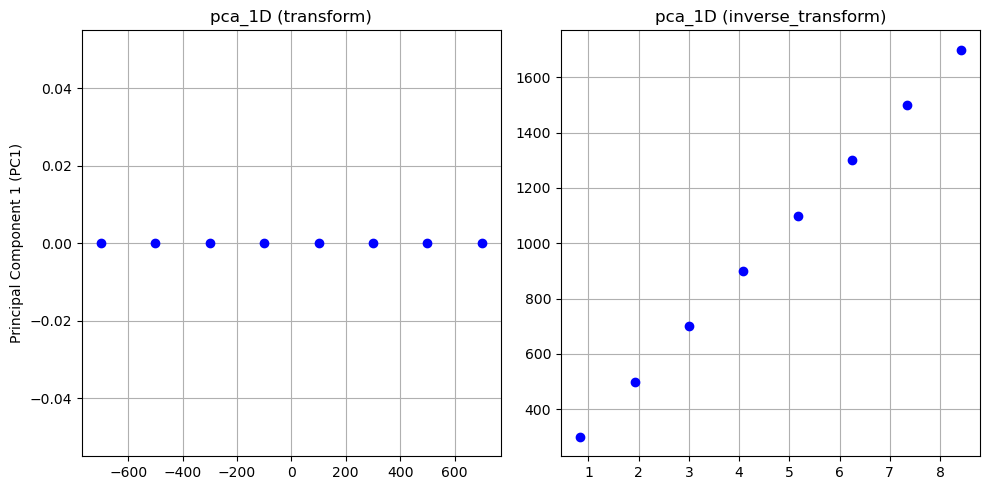

In [12]:
data_1D = pca_1D.transform(data)
data_1D_inverseTransform = pca_1D.inverse_transform(data_1D)

print("Sum of variances:", np.sum(pca_1D.explained_variance_ratio_))

print("\npca_1D (transform):\n", data_1D)
print("\npca_1D (inverse_transform):\n", data_1D_inverseTransform)
print("\nOriginal:\n", data)

plt.figure(figsize=(10, 5))

# Plot 1: Transformed 1D data
plt.subplot(1, 2, 1)
plt.plot(data_1D[:, 0], np.zeros_like(data_1D[:, 0]), 'bo')
plt.ylabel('Principal Component 1 (PC1)')
plt.title('pca_1D (transform)')
plt.grid(True)

# Plot 2: Reconstructed 2D data after inverse transformation
plt.subplot(1, 2, 2)
plt.plot(data_1D_inverseTransform[:,0], data_1D_inverseTransform[:,1], 'bo')
plt.title('pca_1D (inverse_transform)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
data2 = np.loadtxt("data/multipleFeaturesExtended.csv", delimiter=",",skiprows=1)

In [14]:
X_values = data2[:,:-1]
y_values = data2[:,-1]

In [15]:
#reducing 4 dimensions to 3D (to make it easier to plot the features)
print(X_values.shape)
pca2_3D = PCA(n_components=3)
pca2_3D.fit(X_values)
pca2_3D.explained_variance_ratio_

(119, 4)


array([9.99929174e-01, 6.77997192e-05, 2.96166508e-06])

In [16]:
data2_transform3D = pca2_3D.transform(X_values)
df_data2_transform3D =pd.DataFrame(data2_transform3D,columns = ['PC1','PC2','PC3'])

In [17]:
data2_3D_inverseTransform = pca2_3D.inverse_transform(data2_transform3D)

print("Sum of variances:", np.sum(pca2_3D.explained_variance_ratio_))
#0.9999999351419528 of the variance is explained

print("\npca2_3D (transform):\n", data2_transform3D[:10,:])
print("\npca2_3D (inverse_transform):\n", data2_3D_inverseTransform[:10,:])
print("\nOriginal:\n", data2[:10,:-1])

Sum of variances: 0.9999999351419528

pca2_3D (transform):
 [[-2.57980154e+02 -1.61411807e+00  9.30714527e-01]
 [ 1.42020665e+02 -1.46123265e+00  3.11463888e-02]
 [-5.57985405e+02  3.08164529e-01 -1.33953362e+00]
 [ 2.42025017e+02 -3.16468753e+00 -4.64250194e-01]
 [-3.57982920e+02 -5.34494260e-01 -2.01169422e-01]
 [-6.57987437e+02  1.04059112e+00 -1.10052359e+00]
 [ 4.42027132e+02 -3.83292936e+00 -5.88485104e-03]
 [-1.57985794e+02  9.08827388e-01  5.72813586e-02]
 [-2.57983200e+02 -2.97529240e-01 -1.94689173e-01]
 [-5.79768233e+01 -2.73177403e+00 -9.18199518e-01]]

pca2_3D (inverse_transform):
 [[2.40000000e+03 3.99537689e+00 3.00455714e+00 5.99998044e+00]
 [2.80000000e+03 3.50509198e+00 2.50211454e+00 5.00213724e+00]
 [2.10000000e+03 2.00526572e+00 9.94809409e-01 8.00002228e+00]
 [2.90000000e+03 3.50235736e+00 2.49054241e+00 2.99789428e+00]
 [2.30000000e+03 3.00036992e+00 1.99963536e+00 7.00000157e+00]
 [2.00000000e+03 2.00302243e+00 9.97020692e-01 9.00001279e+00]
 [3.10000000e+03 4.0

In [18]:
#plotting all 3 principal components 

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(df_data2_transform3D, x = 'PC1', y = 'PC2', z = 'PC3').update_traces(marker = dict(color = "#000000"))
fig.update_traces(marker = dict(color = "#000000"))
fig.show()

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_values, y_values)

LinearRegression()

In [20]:
new_points = np.array([[3000,3,2,1],[2000,2,1,2]])

In [21]:
#model trainined on original data (without PCA)
model.predict(new_points)

array([440918.47650127, 309386.70983283])

In [22]:
model_pca2_3D = LinearRegression()
model_pca2_3D.fit(data2_transform3D, y_values)

#transforming new points to PCA relative 'dimensions'
new_points_centered = new_points - pca2_3D.mean_ #subtracting mean -> centering
transformed_points = new_points_centered @ pca2_3D.components_.T
predictions = model_pca2_3D.predict(transformed_points)

#PCA 3 dimension data
#compare the results with multipleFeatureLinearRegression.ipynb
print(predictions)

[441101.14075887 309623.38656224]


In [23]:
#reducing 4 dimensions to 2D (to make it easier for plotting with target)
pca2_2D = PCA(n_components=2)
pca2_2D.fit(X_values)
pca2_2D.explained_variance_ratio_

array([9.99929174e-01, 6.77997192e-05])

In [24]:
data2_transform2D = pca2_2D.transform(X_values)
df_data2_transform2D =pd.DataFrame(data2_transform2D,columns = ['PC1','PC2'])

In [25]:
data2_2D_inverseTransform = pca2_2D.inverse_transform(data2_transform2D)

print("Sum of variances:", np.sum(pca2_2D.explained_variance_ratio_))
#0.999996973476873 the variance is explained

print("\npca2_2D (transform):\n", data2_transform2D[:10,:])
print("\npca2_2D (inverse_transform):\n", data2_2D_inverseTransform[:10,:])
print("\nOriginal:\n", data2[:10,:-1])

Sum of variances: 0.999996973476873

pca2_2D (transform):
 [[-2.57980154e+02 -1.61411807e+00]
 [ 1.42020665e+02 -1.46123265e+00]
 [-5.57985405e+02  3.08164529e-01]
 [ 2.42025017e+02 -3.16468753e+00]
 [-3.57982920e+02 -5.34494260e-01]
 [-6.57987437e+02  1.04059112e+00]
 [ 4.42027132e+02 -3.83292936e+00]
 [-1.57985794e+02  9.08827388e-01]
 [-2.57983200e+02 -2.97529240e-01]
 [-5.79768233e+01 -2.73177403e+00]]

pca2_2D (inverse_transform):
 [[2.39999994e+03 3.36249208e+00 2.36153101e+00 5.77149907e+00]
 [2.80000000e+03 3.48391247e+00 2.48059565e+00 4.99449110e+00]
 [2.10000009e+03 2.91614705e+00 1.92028666e+00 8.32886477e+00]
 [2.90000003e+03 3.81804696e+00 2.81129060e+00 3.11186319e+00]
 [2.30000001e+03 3.13716489e+00 2.13862233e+00 7.04938670e+00]
 [2.00000007e+03 2.75137721e+00 1.75736708e+00 9.27018063e+00]
 [3.10000000e+03 4.00864339e+00 2.99949034e+00 2.00146431e+00]
 [2.50000000e+03 2.95946702e+00 1.96198374e+00 7.98593129e+00]
 [2.40000001e+03 3.13285555e+00 2.13404933e+00 7.047796

In [26]:
#plotting all 2 principal components with target 
dataset_3D = df_data2_transform2D.copy()
dataset_3D["target"] = y_values

fig = px.scatter_3d(dataset_3D, x = 'PC1', y = 'PC2', z = 'target').update_traces(marker = dict(color = "#000000"))
fig.update_traces(marker = dict(color = "#FF0000"))
fig.show()

In [27]:
#linear regression with 2 PCs and Target
model_pca2_2D = LinearRegression()
model_pca2_2D.fit(data2_transform2D, y_values)


#transforming new points to PCA relative 'dimensions'
new_points_centered = new_points - pca2_2D.mean_ #subtracting mean -> centering
transformed_points = new_points_centered @ pca2_2D.components_.T
predictions = model_pca2_2D.predict(transformed_points)

#PCA 2 dimension data
print(predictions)

[501056.38210479 413390.8321664 ]


In [28]:
import numpy as np
import plotly.graph_objs as go

# defining the range for PC1, PC2
pc1 = np.linspace(df_data2_transform2D['PC1'].min(), df_data2_transform2D['PC1'].max(), 10)
pc2 = np.linspace(df_data2_transform2D['PC2'].min(), df_data2_transform2D['PC2'].max(), 10)

#meshgrid
pc1_grid, pc2_grid = np.meshgrid(pc1, pc2)

# a col stack (pc1_grid.ravel, pc2_grid.ravel)
grid = np.c_[pc1_grid.ravel(), pc2_grid.ravel()]

# predicting the output for every point on the grid
predicted = model_pca2_2D.predict(grid).reshape(pc1_grid.shape)

# plotting the original data as scatter plot
scatter = go.Scatter3d(x = df_data2_transform3D['PC1'], y = df_data2_transform3D['PC2'], z = y_values, mode='markers', marker=dict(color="#000000"))

surface = go.Surface(x=pc1_grid, y=pc2_grid, z=predicted, colorscale='Viridis')

# creating the layout and adding the traces
layout = go.Layout(title='Linear Regres. Plane', autosize=True, scene=dict(camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64))), width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig = go.Figure(data=[scatter, surface], layout=layout)

iplot(fig)


In [29]:
#reducing 4 dimensions to 1D (to make it easier for plotting with target)
pca2_1D = PCA(n_components=1)
pca2_1D.fit(X_values)
pca2_1D.explained_variance_ratio_ 

array([0.99992917])

In [30]:
data2_transform1D = pca2_1D.transform(X_values)
df_data2_transform1D =pd.DataFrame(data2_transform1D,columns = ['PC1'])

In [31]:
data2_1D_inverseTransform = pca2_1D.inverse_transform(data2_transform1D)

print("Sum of variances:", np.sum(pca2_1D.explained_variance_ratio_))
#0.9999291737577198 the variance is explained

print("\npca2_1D (transform):\n", data2_transform1D[:10,:])
print("\npca2_1D (inverse_transform):\n", data2_1D_inverseTransform[:10,:])
print("\nOriginal:\n", data2[:10,:-1])

Sum of variances: 0.9999291737577198

pca2_1D (transform):
 [[-257.98015354]
 [ 142.02066539]
 [-557.98540451]
 [ 242.02501699]
 [-357.98291951]
 [-657.98743657]
 [ 442.02713177]
 [-157.98579449]
 [-257.98320048]
 [ -57.97682334]]

pca2_1D (inverse_transform):
 [[2.40000376e+03 3.08096253e+00 2.08264326e+00 7.33621158e+00]
 [2.80000346e+03 3.22904873e+00 2.22812348e+00 6.41099777e+00]
 [2.09999936e+03 2.96989617e+00 1.97353141e+00 8.03013266e+00]
 [2.90000753e+03 3.26607182e+00 2.26449504e+00 6.17968473e+00]
 [2.30000128e+03 3.04394003e+00 2.04627227e+00 7.56752095e+00]
 [1.99999761e+03 2.93287394e+00 1.93716069e+00 8.26144034e+00]
 [3.10000908e+03 3.34011555e+00 2.33723577e+00 5.71707388e+00]
 [2.49999784e+03 3.11798192e+00 2.11901119e+00 7.10492165e+00]
 [2.40000072e+03 3.08096140e+00 2.08264215e+00 7.33621863e+00]
 [2.60000653e+03 3.15500671e+00 2.15538443e+00 6.87359792e+00]]

Original:
 [[2.4e+03 4.0e+00 3.0e+00 6.0e+00]
 [2.8e+03 3.0e+00 3.0e+00 5.0e+00]
 [2.1e+03 2.0e+00 1.0e+00

In [32]:
model_pca2_1D = LinearRegression()
model_pca2_1D.fit(data2_transform1D, y_values)


#transforming new points to PCA relative 'dimensions'
new_points_centered = new_points - pca2_1D.mean_ #subtracting mean -> centering
transformed_points = new_points_centered @ pca2_1D.components_.T
predictions = model_pca2_1D.predict(transformed_points)

#PCA 1 dimension data
print(predictions)

[432787.66894805 329800.34058625]


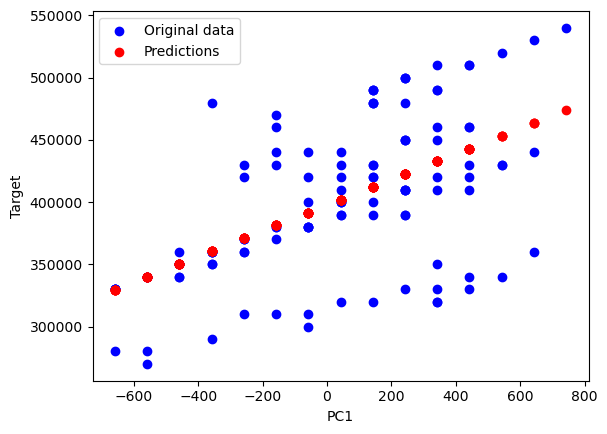

In [33]:
#data points
plt.scatter(data2_transform1D, y_values, color='blue', label='Original data')

# predicted values for new points
transformed_all = (X_values - pca2_1D.mean_) @ pca2_1D.components_.T

plt.scatter(data2_transform1D, model_pca2_1D.predict(transformed_all), color='red', label='Predictions')

plt.xlabel('PC1')
plt.ylabel('Target')
plt.legend()

plt.show()